In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from preprocessing.classes import simpleKinematics, FilterandThresholds
import seaborn as sns
import matplotlib.ticker as ticker
import seaborn as sns
#import h5py
import os
#import lmfit
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks, peak_widths, chirp
from math import floor
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.cluster import KMeans
#import deeplabcut
from scipy.optimize import curve_fit





In [2]:
results_11078_fail1 = pd.read_csv(r'/Users/carlospineda/PycharmProjects/scientificProject/data/cleaned_data/results_undistorted_edit500_singlefail_behavior_shape1_2_cam3_11078_091421DeepCut_resnet50_r_d_cam3_2DJul19shuffle1_200000_time30.csv')

#11078_success
results_11078_success1 = pd.read_csv(r'/Users/carlospineda/PycharmProjects/scientificProject/data/cleaned_data/results_undistorted_edit500_singlesuccess_behavior_shape1_2_cam3_11078_091421DeepCut_resnet50_r_d_cam3_2DJul19shuffle1_200000_time30.csv')
#11081_success_sighted
data_undistored_singlereach_11081_sighted = pd.read_csv(r'/Users/carlospineda/PycharmProjects/scientificProject/data/cleaned_data/results_undistorted_edit500_2_behavior_shape1_cam3_11081_092421DeepCut_resnet50_rd_cam3_2DJul19shuffle1_20000_time30.csv')


data_undistorted_singlereach_11079 = pd.read_csv(r'/Users/carlospineda/PycharmProjects/scientificProject/data/cleaned_data/results_undistorted_edit500_singlereach_behavior_shape2_cam3_11079_071421DeepCut_resnet50_rd_cam3_2DJul19shuffle1_200000_time30.csv')
#11080_fail
results_11080_fail1 = pd.read_csv(r'/Users/carlospineda/PycharmProjects/scientificProject/data/cleaned_data/results_undistorted_edit500_singlefail_behavior_shape1_2_cam3_11080_091421DeepCut_resnet50_r_d_cam3_2DJul19shuffle1_200000_time30.csv')
#11080_success
results_11080_success1 = pd.read_csv(r'/Users/carlospineda/PycharmProjects/scientificProject/data/cleaned_data/results_undistorted_edit500_singlesuccess_behavior_shape1_2_cam3_11080_091421DeepCut_resnet50_r_d_cam3_2DJul19shuffle1_200000_time30.csv')

frames = [results_11078_success1 , results_11080_success1,data_undistored_singlereach_11081_sighted , data_undistorted_singlereach_11079,  results_11078_success1]
merged_data = pd.concat(frames, keys = ['11080',  '11081', '11079', '11078' ])
merged_data = merged_data.drop_duplicates(keep = 'first')
print(merged_data)

Multi_indexer = FilterandThresholds('MultiIndex')
merged_data_multi = Multi_indexer.MultiIndexMaker(merged_data)
#make the index tuple a new column
merged_data_multi['groups'] = merged_data_multi.index
merged_data_multi['groups'] = [x[0] for x in merged_data_multi['groups']]

#reset the index
merged_data_multi = merged_data_multi.reset_index()

          bodyparts       WristR     WristR.1     WristR.2       WristL  \
11080 0      coords            x            y   likelihood            x   
      1           0  243.5402056  262.3016491  0.681043684  244.7341208   
      2           1  243.5230794  262.4394171  0.575729668  251.4566124   
      3           2  243.5097854  262.4108281  0.552612841  251.4025817   
      4           3  243.5042795  262.3069792  0.637749612  251.4911625   
...             ...          ...          ...          ...          ...   
11078 627       626  238.4744034  259.1736585  0.383376598  250.9293416   
      628       627  238.4682143  259.1670738  0.370035022  250.9477365   
      629       628  238.4545217  259.1534495  0.379853547  250.9673288   
      630       629  238.4473002  259.1529198  0.371739447  250.9837712   
      631       630  238.4430182  259.1527802  0.364157915  251.0412179   

              WristL.1     WristL.2       ElbowR     ElbowR.1     ElbowR.2  \
11080 0              

<ipython-input-2-17474841e0e0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_multi['groups'] = merged_data_multi.index
<ipython-input-2-17474841e0e0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_multi['groups'] = [x[0] for x in merged_data_multi['groups']]


In [3]:
#Interpolation is tricky - it fills missing values to make the data align to it self. We want to align peaks though.




#We can align peaks by the mean
#https://stackoverflow.com/questions/19642443/use-of-pandas-shift-to-align-datasets-based-on-scipy-signal-correlate



#method 2- can we just plot one axis

leftpaw_fileter = FilterandThresholds('LeftPaw')
merged_data_multi_leftpaw = leftpaw_fileter.bodypart_selector(merged_data_multi, 'WristL')
print(merged_data_multi_leftpaw)

           WristL                                   Time
                x            y   likelihood            s
0     244.7341208  260.3950853   0.02993281            0
1     251.4566124  261.1476763  0.029754911  0.033333333
2     251.4025817  261.2095697  0.031201465  0.066666667
3     251.4911625  261.2926928  0.031027166          0.1
4     244.5886905  260.5217062  0.047348272  0.133333333
...           ...          ...          ...          ...
1428  250.9293416  261.4208103  0.066129155  20.86666667
1429  250.9477365  261.4138249  0.068338901         20.9
1430  250.9673288  261.4028137  0.066844486  20.93333333
1431  250.9837712  261.3686564   0.06840729  20.96666667
1432  251.0412179  261.3133905  0.066298366           21

[1433 rows x 4 columns]


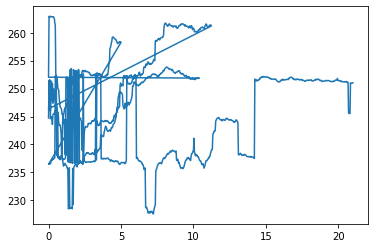

In [4]:
#extract coordinates
x = merged_data_multi_leftpaw.xs('x', axis=1, level=1, drop_level=False).values.astype(float)
z = merged_data_multi_leftpaw.xs('y', axis=1, level=1, drop_level=False).values.astype(float)
y = merged_data_multi_leftpaw.xs('s', axis=1, level=1, drop_level=False).values.astype(float)

plt.plot(y, x)

